In [31]:
import numpy as np
import glob
from   PIL import Image, ImageOps
import matplotlib.pyplot as plt
import random

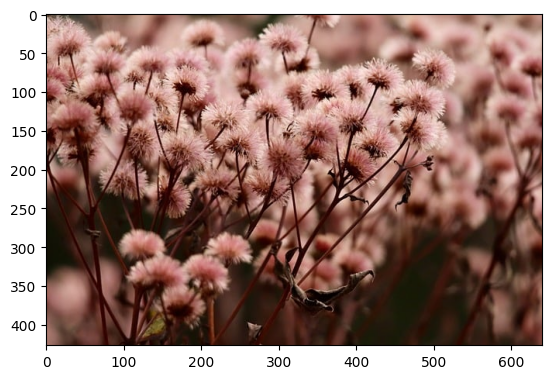

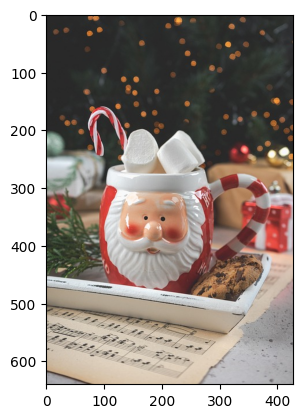

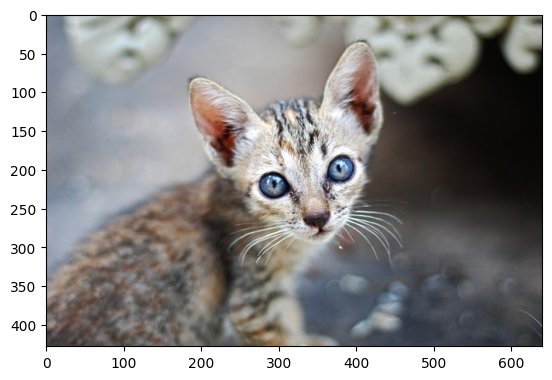

In [32]:
images = []

for filename in glob.glob('demo images/*.jpg'): #assuming gif
    im = Image.open(filename)
    im = np.array(im).astype(np.float32) / 255
    images.append(im)

    plt.imshow(im)
    plt.show()

In [33]:
def get_noisy_images(image, display_process = False):
    """Image should be of the format
    (height, width, channels), and be 
    filled with floats between 0 and 1.
    
    Returns a list of static images
    
    display_process tells whether or not
    to plot the static images as they are created"""
    
    # Start with pure random noise
    random_noise = np.random.uniform(0, 1, image.shape)

    if display_process:
        plt.imshow(random_noise)
        plt.show()

    # here we make clip the noise to within the acceptable range
    full_white = np.ones(image.shape)
    full_dark  = np.zeros(image.shape)
    acceptable_range = np.minimum(np.abs(image - full_dark), np.abs(image - full_white))
    noise_difference = random_noise - image
    replace_mask = (abs(noise_difference) <= acceptable_range)
    replace_items = acceptable_range * np.sign(noise_difference)
    noise_difference = (noise_difference * replace_mask) + (replace_items * (1 - replace_mask))

    # +image again will give yo uthe noise back
    random_noise = image + noise_difference

    if display_process:
        plt.imshow(random_noise)
        plt.show()

    static_image_A = image + noise_difference
    static_image_B = image - noise_difference

    if display_process:
        plt.imshow(static_image_A)
        plt.show()
        plt.imshow(static_image_B)
        plt.show()

    #now jumble pixels between the two, to shuffle it better

    swap_map = (np.random.random(image.shape) > .5) * 1

    static_image_A, static_image_B = (static_image_A * swap_map) + (static_image_B * (1 - swap_map)), (static_image_B * swap_map) + (static_image_A * (1 - swap_map))

    if display_process:
        plt.imshow(static_image_A)
        plt.show()
        plt.imshow(static_image_B)
        plt.show()

    return static_image_A, static_image_B

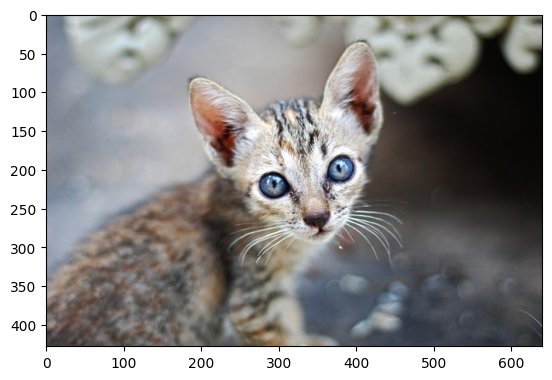

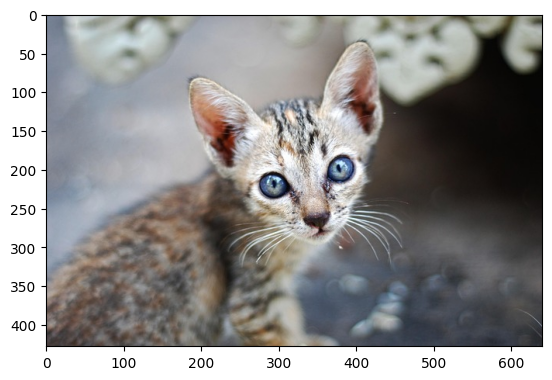

Difference between original and reconstructed image: 0.0


In [34]:
original_image = random.choice(images)
A, B = get_noisy_images(original_image)
reconstructed_image = (A+B) / 2

plt.imshow(original_image)
plt.show()
plt.imshow(reconstructed_image)
plt.show()

print("Difference between original and reconstructed image:", np.sum(original_image - reconstructed_image))


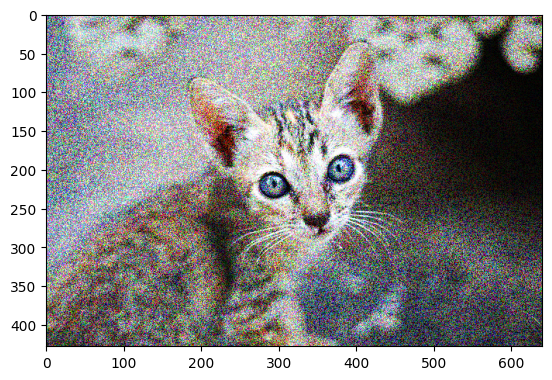

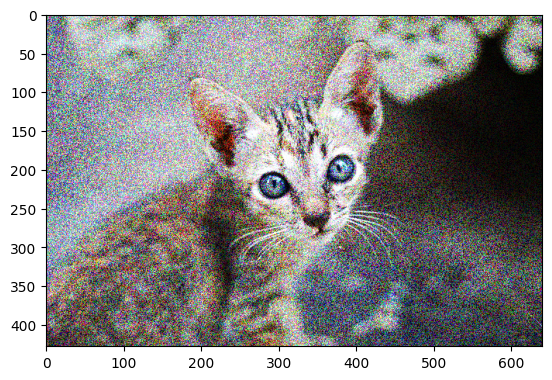

In [35]:
plt.imshow(A)
plt.show()
plt.imshow(B)
plt.show()

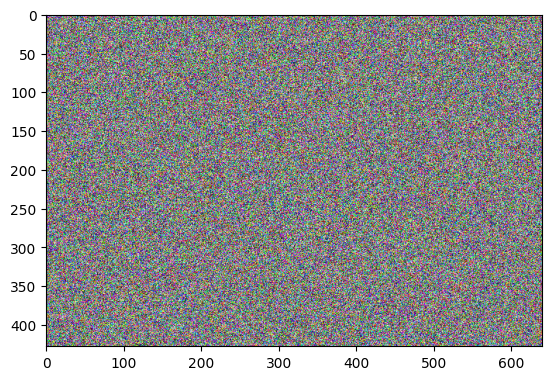

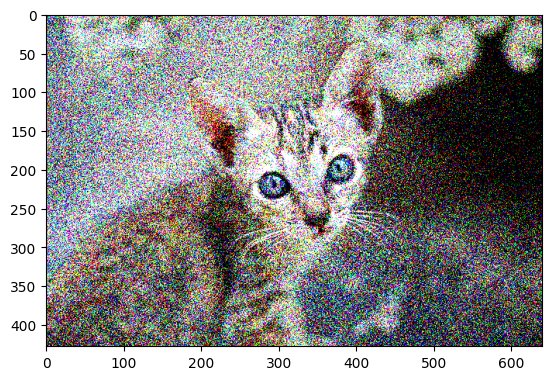

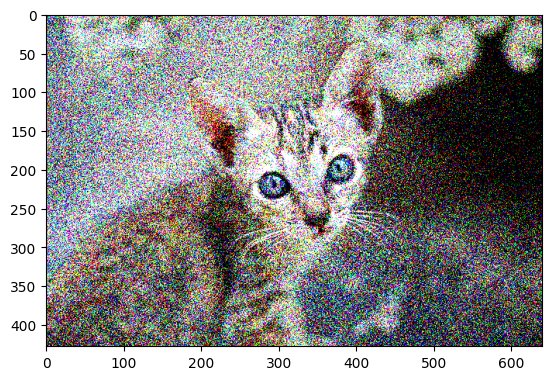

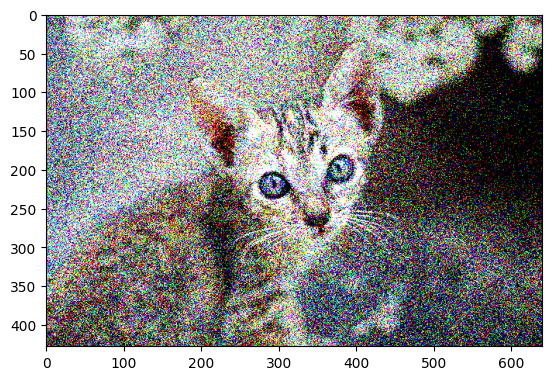

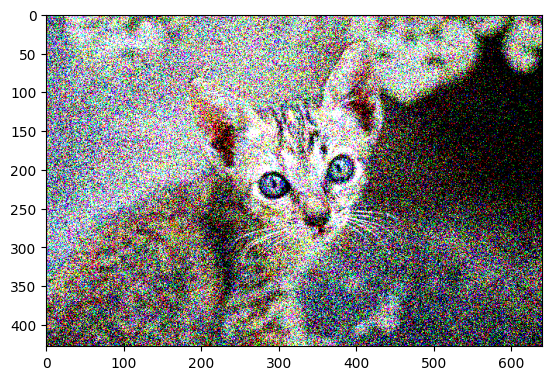

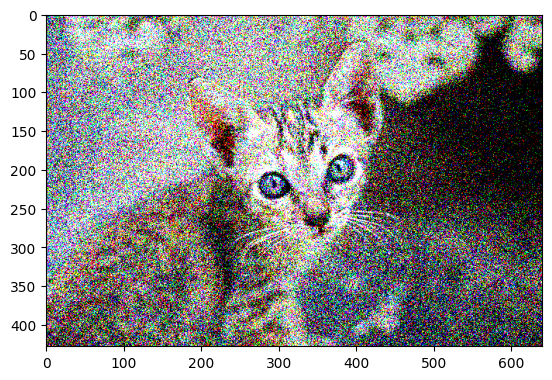

(array([[[1.        , 0.        , 0.        ],
         [0.66179735, 0.        , 1.        ],
         [0.10317482, 0.        , 1.        ],
         ...,
         [0.74863273, 0.66742255, 1.        ],
         [0.        , 0.        , 1.        ],
         [1.        , 1.        , 1.        ]],
 
        [[1.        , 1.        , 1.        ],
         [0.        , 0.95588952, 1.        ],
         [0.        , 1.        , 0.11239928],
         ...,
         [0.        , 0.        , 1.        ],
         [0.        , 0.        , 0.        ],
         [1.        , 1.        , 1.        ]],
 
        [[0.66606915, 0.        , 0.        ],
         [1.        , 0.21166636, 1.        ],
         [0.91963509, 0.04344394, 0.        ],
         ...,
         [1.        , 1.        , 0.        ],
         [1.        , 0.        , 1.        ],
         [0.        , 0.1403024 , 1.        ]],
 
        ...,
 
        [[0.96011122, 1.        , 0.        ],
         [0.70884136, 1.        , 1.     

In [36]:
loop_image = np.array(original_image)
for i in range(5):
    loop_image, _ = get_noisy_images(loop_image)

get_noisy_images(loop_image, True)